### Chapter 8: Integration
* Aids evaluation of definite integrals between limits [a,b]. Limits can be finite, semi-infinite (a = -oo or b = oo) or infinite (a = -oo and b = oo).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import numpy as np
from scipy import integrate
import sympy
sympy.init_printing()

### Simpson's rule
* Strategy for evaluating integral I(f): write it as discrete sum that approximates value of integral. ("n-point quadrature rule".)
* Quadrature rules derived from f(x) interpolations along interval [a,b].
* using 0th-order polynomial (constant value) of midpoint = midpoint rule.
* using 1st-order polynomial, evalated at endpoints, = trapezoid rule.
* using 2nd-order polynomial, midpoint & endpoints = Simpson's rule.

In [3]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [4]:
#x = a, (a+b)/3, 2 * (a+b)/3, b # 3rd order quadrature rule
x = a, (a+b)/2, b # simpson's rule
#x = a, b # trapezoid rule
#x = ((b+a)/2,)  # mid-point rule

In [5]:
# weight factors
w = [sympy.symbols("w_%d" % i) 
     for i in range(len(x))] 
w

In [6]:
# quadrature rule
q_rule = sum([w[i] * f(x[i]) 
              for i in range(len(x))])
q_rule

In [7]:
# using lambda to create symbolics for basis functions
phi = [sympy.Lambda(X, X**n) 
       for n in range(len(x))]
phi

In [8]:
eqs = [q_rule.subs(f, phi[n]) 
       - sympy.integrate(phi[n](X), (X, a, b)) 
       for n in range(len(phi))]
eqs

In [9]:
# solves for weight factors
w_sol = sympy.solve(eqs, w)
w_sol

In [10]:
q_rule.subs(w_sol).simplify()

### Numerical Integration w/ SciPy
* Two types of quadrature routines:

1) accepts integrand as Python function ("Gaussian" methods - *quad(), quadrature(), fixed_quad()*)

2) accepts arrays of integrand samples at given points ("Newton-Cotes methods - *trapz(), simps(), romb()*)

### Simple integration example

In [11]:
def f(x):
    return np.exp(-x**2)

In [12]:
# return estimated integral & abs error
# error tolerances can be set using epsabs, epsrel keywords
val, err = integrate.quad(f, -1, 1)
val, err

In [13]:
val, err = integrate.quadrature(f, -1, 1)
val, err

### Extra arguments

In [14]:
def f(x, a, b, c):
    return a * np.exp(-((x-b)/c)**2)

In [15]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))
val, err

### Reshuffle arguments

In [16]:
from scipy.special import jv

In [17]:
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)
val, err

### Infinite limits 

In [18]:
f = lambda x: np.exp(-x**2)

In [19]:
val, err = integrate.quad(f, -np.inf, np.inf)
val, err

### Singularities
* quadrature() & fixed_quad() functions only support finite integration limits.

In [20]:
f = lambda x: 1/np.sqrt(abs(x))

In [21]:
a, b = -1, 1

In [22]:
# this integral diverges at x=0. quad() can't handle it.
integrate.quad(f, a, b)

/home/bjpcjp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [23]:
# to avoid problem points, use points keyword
integrate.quad(f, a, b, points=[0])

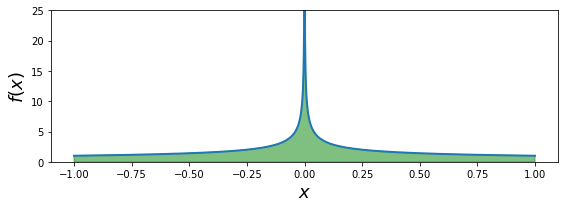

In [24]:
# visualize to see what's going on
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)

fig.tight_layout()
fig.savefig("ch8-diverging-integrand.pdf")

### Tabulated integrand
* use case: integrand that is specified only at predetermined points. (ie, not using a Python function that can be evaluated at any point.)

In [25]:
f = lambda x: np.sqrt(x)

In [26]:
a, b = 0, 2

In [27]:
x = np.linspace(a, b, 25)

In [28]:
y = f(x)

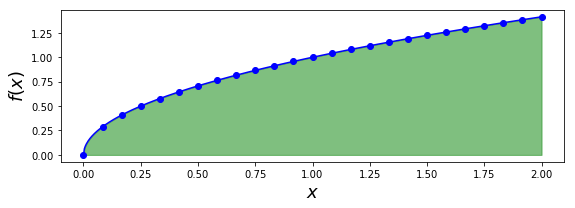

In [29]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()
fig.savefig("ch8-tabulated-integrand.pdf")

In [30]:
# trapezoid method
val_trapz = integrate.trapz(y, x)
val_trapz

In [31]:
# simpson's rule
val_simps = integrate.simps(y, x)
val_simps

In [32]:
# find error estimates by computing integral & comparising to above estimate
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)

val_exact, (val_exact-val_trapz), (val_exact-val_simps)

* We can't ask trapz or simps to find more accurate answers unless more samples are given, or a higher-order method is used.
* romb() function helps -- implementation of Romberg method

In [33]:
x = np.linspace(a, b, 1 + 2**6)
len(x)

In [34]:
y = f(x)

In [35]:
val_exact - integrate.romb(y, dx=(x[1]-x[0]))

In [36]:
val_exact - integrate.simps(y, dx=x[1]-x[0])

## Higher dimension

In [37]:
def f(x):
    return np.exp(-x**2)

In [38]:
%time integrate.quad(f, a, b)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 70.1 µs


In [39]:
def f(x, y):
    return np.exp(-x**2-y**2)

In [40]:
a, b = 0, 1

In [41]:
g = lambda x: 0
h = lambda x: 1

In [42]:
integrate.dblquad(f, a, b, g, h)

In [43]:
integrate.dblquad(
    lambda x, y: np.exp(-x**2-y**2), 
    0, 1, 
    lambda x: 0, 
    lambda x: 1)

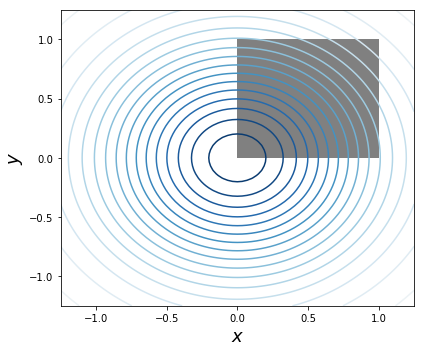

In [44]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

bound_rect = plt.Rectangle((0, 0), 1, 1,
                           facecolor="grey")
ax.add_patch(bound_rect)

ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

fig.tight_layout()
fig.savefig("ch8-multi-dim-integrand.pdf")

In [45]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

### triple integral

In [46]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

In [47]:
integrate.tplquad(f, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [48]:
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

### Arbitrary number of integrations

In [49]:
def f(*args):
    return  np.exp(-np.sum(np.array(args)**2))

In [50]:
%time integrate.nquad(f, [(0,1)] * 1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 256 µs


In [51]:
%time integrate.nquad(f, [(0,1)] * 2)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.08 ms


In [52]:
%time integrate.nquad(f, [(0,1)] * 3)

CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 64.3 ms


In [53]:
%time integrate.nquad(f, [(0,1)] * 4)

CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.28 s


In [54]:
%time integrate.nquad(f, [(0,1)] * 5)

CPU times: user 26 s, sys: 0 ns, total: 26 s
Wall time: 26 s


### Monte Carlo integration
* use case: when #integrations result in unacceptable compute times (n>4?)

In [55]:
#from skmonaco import mcquad
# 1st arg: integrand (python func)
# 2nd arg: list of lower integration limits
# 3rd arg: list of upper "                "

In [56]:
#%time val, err = mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)
#val, err

In [57]:
#%time val, err = mcquad(f, xl=np.zeros(10), xu=np.ones(10), npoints=100000)
#val, err

## Symbolic and multi-precision quadrature

In [58]:
x = sympy.symbols("x")

In [59]:
f = 2 * sympy.sqrt(1-x**2)

In [60]:
a, b = -1, 1

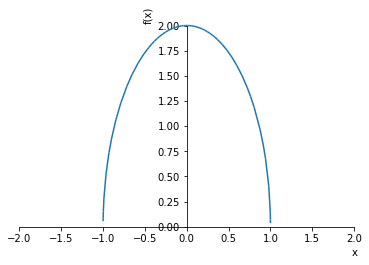

In [61]:
sympy.plot(f, (x, -2, 2));

In [62]:
val_sym = sympy.integrate(f, (x, a, b))
val_sym

In [63]:
sympy.mpmath.mp.dps = 75

In [64]:
f_mpmath = sympy.lambdify(x, f, 'mpmath')

In [65]:
# compute integral
val = sympy.mpmath.quad(f_mpmath, (a, b))
sympy.sympify(val)

In [66]:
# compare result with known value. error sufficiently small?
sympy.N(val_sym, sympy.mpmath.mp.dps+1) - val

In [67]:
%timeit sympy.mpmath.quad(f_mpmath, [a, b])

100 loops, best of 3: 6.99 ms per loop


In [68]:
f_numpy = sympy.lambdify(x, f, 'numpy')

In [69]:
%timeit integrate.quad(f_numpy, a, b)

1000 loops, best of 3: 437 µs per loop


### double and triple integrals

In [70]:
def f2(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f3(x, y, z):
    return np.cos(x)*np.cos(y)*np.cos(z)*np.exp(-x**2-y**2-z**2)

In [71]:
integrate.dblquad(f2, 0, 1, lambda x : 0, lambda x : 1)

In [72]:
integrate.tplquad(f3, 0, 1, 
                  lambda x : 0, 
                  lambda x : 1, 
                  lambda x, y : 0, 
                  lambda x, y : 1)

In [73]:
x, y, z = sympy.symbols("x, y, z")

In [74]:
f2 = sympy.cos(x)*sympy.cos(y)*sympy.exp(-x**2-y**2)

In [75]:
f3 = sympy.exp(-x**2 - y**2 - z**2)

In [76]:
f2_numpy = sympy.lambdify((x, y), f2, 'numpy')

In [77]:
integrate.dblquad(f2_numpy, 0, 1, 
                  lambda x: 0, 
                  lambda x: 1)

In [78]:
f3_numpy = sympy.lambdify((x, y, z), f3, 'numpy')

In [79]:
integrate.tplquad(f3_numpy, 0, 1, 
                  lambda x: 0, 
                  lambda x: 1, 
                  lambda x, y: 0, 
                  lambda x, y: 1)

In [80]:
sympy.mpmath.mp.dps = 30

In [81]:
f2_mpmath = sympy.lambdify((x, y), f2, 'mpmath')

In [82]:
sympy.mpmath.quad(f2_mpmath, (0, 1), (0, 1))

mpf('0.430564794306099099242308990195783')

In [83]:
f3_mpmath = sympy.lambdify((x, y, z), f3, 'mpmath')

In [84]:
res = sympy.mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))

In [85]:
sympy.sympify(res)

## Line integrals

In [86]:
t, x, y = sympy.symbols("t, x, y")

In [87]:
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))

In [88]:
sympy.line_integrate(1, C, [x, y])

In [89]:
sympy.line_integrate(x**2 * y**2, C, [x, y])

### Integral transformations
* *integral transforms*: accepts a function as input, returns another function.
* best when computed symbolically
* two examples: *laplace* and *fourier*

### Laplace transforms

In [90]:
# example: laplace transform of f(t) = sin(at)
# define symbols

s    = sympy.symbols("s")
a, t = sympy.symbols("a, t", positive=True)
f    = sympy.sin(a*t)

In [91]:
# compute transform
# returns tuple: result transform, value 'A' from convergence condition, any add'l conditions.

sympy.laplace_transform(f, t, s)

In [92]:
# if you want just the result function:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [93]:
# inverse transform (swap 's','t' arguments)
sympy.inverse_laplace_transform(F, s, t, noconds=True)

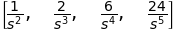

In [94]:
[sympy.laplace_transform(f, t, s, noconds=True) 
 for f in [t, t**2, t**3, t**4]]

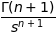

In [95]:
# computing general results with arbitrary integer exponents
n = sympy.symbols(
    "n", integer=True, positive=True)

sympy.laplace_transform(t**n, t, s, noconds=True)

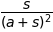

In [96]:
# laplace xform of composite expression
sympy.laplace_transform(
    (1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

### Fourier Transforms
* available functions: *fourier_transform(), inverse_fourier_transform()*

In [97]:
w = sympy.symbols("omega")

In [98]:
f = sympy.exp(-a*t**2)

In [99]:
help(sympy.fourier_transform)

Help on function fourier_transform in module sympy.integrals.transforms:

fourier_transform(f, x, k, **hints)
    Compute the unitary, ordinary-frequency Fourier transform of `f`, defined
    as
    
    .. math:: F(k) = \int_{-\infty}^\infty f(x) e^{-2\pi i x k} \mathrm{d} x.
    
    If the transform cannot be computed in closed form, this
    function returns an unevaluated :class:`FourierTransform` object.
    
    For other Fourier transform conventions, see the function
    :func:`sympy.integrals.transforms._fourier_transform`.
    
    For a description of possible hints, refer to the docstring of
    :func:`sympy.integrals.transforms.IntegralTransform.doit`.
    Note that for this transform, by default ``noconds=True``.
    
    >>> from sympy import fourier_transform, exp
    >>> from sympy.abc import x, k
    >>> fourier_transform(exp(-x**2), x, k)
    sqrt(pi)*exp(-pi**2*k**2)
    >>> fourier_transform(exp(-x**2), x, k, noconds=False)
    (sqrt(pi)*exp(-pi**2*k**2), True)
  

In [100]:
F = sympy.fourier_transform(f, t, w)
F

In [101]:
sympy.inverse_fourier_transform(F, w, t)